<h1> Analysis on Data from National Highway Traffic Safety Administration Fatality Analysis Reporting System </h1>

The goal of this project is to examine the differences between traffic crash data from 1990 to 2019 to determine if improvement in car safety standards have a correlation with fewer crashes. Some background on this data includes increased regulations in airbag technology and car safety features such as adaptive cruise control, lane keep assist, backup cameras, and aided hands free communication in vehicles. 

Questions to answer: 
 <br> • Has there been a significant decrease in the total count of car crashes from 1980 to 2019?
 <br> • Has there been a significant decrease in fatal car accidents between 1980 and 2019?
 <br> • Where do most crashes occur?
     <br>           - Interstate highways, intersections, junctions?
 <br> • Has the number of drowsy driving incidents decreased from 1990 to 2019?
 <br> • Does the dirver having previous incidents impact fatal crash likelihood?

In [64]:
### these are the packages that were imported to use for analysis and visualization
import pandas as pd #for dataframes 
import numpy as np #arrays
import seaborn as sns #for line plots
import matplotlib.pyplot as plt #for plots
from scipy import stats #for statistical analysis
import statsmodels.api as sm 

<br> STATE = The state where the crash occured 
<br> HIT_RUN = Whether or not the crash was a hit and run (1=True, 0=False) 
<br> MAKE = Make of the car 
<br> MODEL = Model of the car 
<br> VIN_"x" = the vin digits 1-10 of the car 
<br> ROLLOVER = Whether or not the car rolled over in the accident (1=True, 0=False) 
<br> J_KNIFE = Whether or not the car jacknifed (1=True, 0=False) 
<br> TOWAWAY = Whether or not the car had to be towed away (1=True, 0=False) 
<br> OCUPANTS = Number of ocupants in the vehicle at the time of the accident
<br> DEATHS = Number of deaths cased by the accident
<br> DR_DRINK = If the driver was drunk or not
<br> VIOL_CHG = If the driver has a violent charge
<br> PREV_ACC = If the driver had a previous accusation
<br> PREV_SUS = If the driver had a previous license suspension 
<br> PREV_DWI = If the driver had a previous driving under the influence charge
<br> PREV_OTH = If the driver had any other previous driving incidents

In [82]:
#importing data
#data retrieved from NHTSA (National Highway Traffic Safety Administration)
vehicle_1980_full = pd.read_csv('VEHICLE1980.csv', encoding='ISO-8859-1')
vehicle_1985_full = pd.read_csv('VEHICLE1985.csv', encoding='ISO-8859-1')
vehicle_1990_full = pd.read_csv('VEHICLE1990.csv', encoding='ISO-8859-1')
vehicle_1995_full = pd.read_csv('VEHICLE1995.csv', encoding='ISO-8859-1')
vehicle_2000_full = pd.read_csv('VEHICLE2000.csv', encoding='ISO-8859-1')
vehicle_2005_full = pd.read_csv('VEHICLE2005.csv', encoding='ISO-8859-1')
vehicle_2010_full = pd.read_csv('VEHICLE2010.csv', encoding='ISO-8859-1')
vehicle_2015_full = pd.read_csv('Vehicle2015.csv', encoding='ISO-8859-1')
vehicle_2019_full = pd.read_csv('Vehicle2019.csv', encoding='ISO-8859-1')

/Users/Maajid/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (53) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/Maajid/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (60) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/Maajid/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (49,50) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/Maajid/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = a

In [65]:
#Taking a simple random sample without replacement from each dataframe
vehicle_1980 = vehicle_1980_full.sample(n=20000)
vehicle_1985 = vehicle_1985_full.sample(n=20000)
vehicle_1990 = vehicle_1990_full.sample(n=20000)
vehicle_1995 = vehicle_1995_full.sample(n=20000)
vehicle_2000 = vehicle_2000_full.sample(n=20000)
vehicle_2005 = vehicle_2005_full.sample(n=20000)
vehicle_2010 = vehicle_2010_full.sample(n=20000)
vehicle_2015 = vehicle_2015_full.sample(n=20000)
vehicle_2019 = vehicle_2019_full.sample(n=20000)

In [66]:
# Finding the average number of hit and runs for each year between 1980 and 2019
hit_1980_avg = np.mean(vehicle_1980['HIT_RUN'])
hit_1985_avg = np.mean(vehicle_1985['HIT_RUN'])
hit_1990_avg = np.mean(vehicle_1990['HIT_RUN'])
hit_1995_avg = np.mean(vehicle_1995['HIT_RUN'])
hit_2000_avg = np.mean(vehicle_2000['HIT_RUN'])
hit_2005_avg = np.mean(vehicle_2005['HIT_RUN'])
hit_2010_avg = np.mean(vehicle_2010['HIT_RUN'])
hit_2015_avg = np.mean(vehicle_2015['HIT_RUN'])
hit_2019_avg = np.mean(vehicle_2019['HIT_RUN'])
print("The average number of hit and runs out of all the crashes in 1980 is " + str(hit_1980_avg))
print("The average number of hit and runs out of all the crashes in 1985 is " + str(hit_1985_avg))
print("The average number of hit and runs out of all the crashes in 1990 is " + str(hit_1990_avg))
print("The average number of hit and runs out of all the crashes in 1995 is " + str(hit_1995_avg))
print("The average number of hit and runs out of all the crashes in 2000 is " + str(hit_2000_avg))
print("The average number of hit and runs out of all the crashes in 2005 is " + str(hit_2005_avg))
print("The average number of hit and runs out of all the crashes in 2010 is " + str(hit_2010_avg))
print("The average number of hit and runs out of all the crashes in 2015 is " + str(hit_2015_avg))
print("The average number of hit and runs out of all the crashes in 2019 is " + str(hit_2019_avg))

The average number of hit and runs out of all the crashes in 1980 is 0.03065
The average number of hit and runs out of all the crashes in 1985 is 0.063
The average number of hit and runs out of all the crashes in 1990 is 0.0663
The average number of hit and runs out of all the crashes in 1995 is 0.0571
The average number of hit and runs out of all the crashes in 2000 is 0.05315
The average number of hit and runs out of all the crashes in 2005 is 0.07065
The average number of hit and runs out of all the crashes in 2010 is 0.0354
The average number of hit and runs out of all the crashes in 2015 is 0.04155
The average number of hit and runs out of all the crashes in 2019 is 0.0457


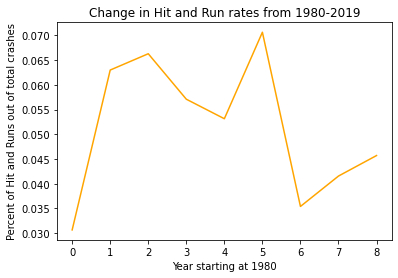

In [115]:
#looking at the change over time in hit and runs 
hit_and_run_ot = np.array([hit_1980_avg, hit_1985_avg, hit_1990_avg, hit_1995_avg, 
                          hit_2000_avg, hit_2005_avg, hit_2010_avg, hit_2015_avg, hit_2019_avg])
plt.plot(hit_and_run_ot, linestyle='solid', color="Orange")
plt.title('Change in Hit and Run rates from 1980-2019')
plt.ylabel('Percent of Hit and Runs out of total crashes')
plt.xlabel('Year starting at 1980')
plt.show()

In [86]:
# Finding the average number of rollovers from 1980 to 2019
roll_1980_avg = np.mean(vehicle_1980['ROLLOVER'])
roll_1985_avg = np.mean(vehicle_1985['ROLLOVER'])
roll_1990_avg = np.mean(vehicle_1990['ROLLOVER'])
roll_1995_avg = np.mean(vehicle_1995['ROLLOVER'])
roll_2000_avg = np.mean(vehicle_2000['ROLLOVER'])
roll_2005_avg = np.mean(vehicle_2005['ROLLOVER'])
roll_2010_avg = np.mean(vehicle_2010['ROLLOVER'])
roll_2015_avg = np.mean(vehicle_2015['ROLLOVER'])
roll_2019_avg = np.mean(vehicle_2019['ROLLOVER'])
print("The average number of rollovers out of all the crashes in 1980 is " + str(roll_1980_avg))
print("The average number of rollovers out of all the crashes in 1985 is " + str(roll_1985_avg))
print("The average number of rollovers out of all the crashes in 1990 is " + str(roll_1990_avg))
print("The average number of rollovers out of all the crashes in 1995 is " + str(roll_1995_avg))
print("The average number of rollovers out of all the crashes in 2000 is " + str(roll_2000_avg))
print("The average number of rollovers out of all the crashes in 2005 is " + str(roll_2005_avg))
print("The average number of rollovers out of all the crashes in 2010 is " + str(roll_2010_avg))
print("The average number of rollovers out of all the crashes in 2015 is " + str(roll_2015_avg))
print("The average number of rollovers out of all the crashes in 2019 is " + str(roll_2019_avg))

The average number of rollovers out of all the crashes in 1980 is 0.2779
The average number of rollovers out of all the crashes in 1985 is 0.25255
The average number of rollovers out of all the crashes in 1990 is 0.27505
The average number of rollovers out of all the crashes in 1995 is 0.28805
The average number of rollovers out of all the crashes in 2000 is 0.30075
The average number of rollovers out of all the crashes in 2005 is 0.3231
The average number of rollovers out of all the crashes in 2010 is 0.25735
The average number of rollovers out of all the crashes in 2015 is 0.23555
The average number of rollovers out of all the crashes in 2019 is 0.2371


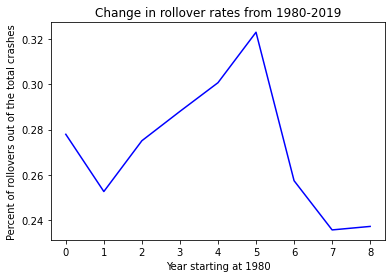

In [113]:
#looking at the change over time in hit and runs 
rollover_ot = np.array([roll_1980_avg, roll_1985_avg, roll_1990_avg, roll_1995_avg, 
                        roll_2000_avg, roll_2005_avg, roll_2010_avg, roll_2015_avg, roll_2019_avg])
plt.plot(rollover_ot, linestyle='solid', color="blue")
plt.title('Change in rollover rates from 1980-2019')
plt.ylabel('Percent of rollovers out of the total crashes')
plt.xlabel('Year starting at 1980')
plt.show()

In [106]:
# Looking at the change of total deaths caused by traffic accidents over time
total_deaths_1980 = np.sum(vehicle_1980["DEATHS"])
total_deaths_1985 = np.sum(vehicle_1985["DEATHS"])
total_deaths_1990 = np.sum(vehicle_1990["DEATHS"])
total_deaths_1995 = np.sum(vehicle_1995["DEATHS"])
total_deaths_2000 = np.sum(vehicle_2000["DEATHS"])
total_deaths_2005 = np.sum(vehicle_2005["DEATHS"])
total_deaths_2010 = np.sum(vehicle_2010["DEATHS"])
total_deaths_2015 = np.sum(vehicle_2015["DEATHS"])
total_deaths_2019 = np.sum(vehicle_2019["DEATHS"])
total_deaths_ot = np.array([total_deaths_1980, total_deaths_1985, total_deaths_1990, total_deaths_1995, 
                           total_deaths_2000, total_deaths_2005, total_deaths_2010, total_deaths_2015, 
                           total_deaths_2019])
total_deaths_ot


array([13199, 12398, 12434, 12481, 12594, 12560, 12534, 11651, 11324])

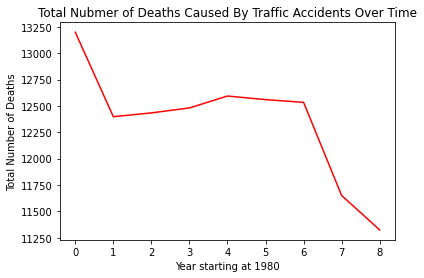

In [119]:
plt.plot(total_deaths_ot, linestyle='solid', color="red")
plt.title('Total Nubmer of Deaths Caused By Traffic Accidents Over Time')
plt.ylabel('Total Number of Deaths')
plt.xlabel('Year starting at 1980')
plt.show()

In [124]:
import statsmodels.api as sm
# Define the explanatory and response variables
X = vehicle_2019['DR_DRINK']
X = sm.add_constant(X)
y = vehicle_2019['DEATHS']

# Apply the regression equation
model = sm.OLS(y, X).fit()

# Determine the regression equation
b0 = round(model.params[0], 2)
b1 = round(model.params[1], 2)


print("The regression equation is: y = " + str(b0) + " + " + str(b1) + "x.")


The regression equation is: y = 0.5 + 0.38x.


**Interpretation of the regression equqation:**
<br> • y: response variable i.e prediction of death count
<br> • 0.5: b0 value i.e. the sample intercept 
<br> "If there there are no previous driving while drunk charges, the predicted death count is going to be 0.5"
<br> • 0.38: b1 value i.e. the sample slope
<br> "If there is an increase of one driving while drunk charge, the predicted death count increases by 0.38"

In [123]:
# t-test and confidence interval for the slope
model_output = model.summary()
print(model_output)


                            OLS Regression Results                            
Dep. Variable:                 DEATHS   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     1216.
Date:                Sun, 13 Feb 2022   Prob (F-statistic):          1.02e-258
Time:                        17:46:27   Log-Likelihood:                -17282.
No. Observations:               20000   AIC:                         3.457e+04
Df Residuals:                   19998   BIC:                         3.458e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5025      0.004    112.864      0.0

In [126]:
# Looking at the change of average number of deaths caused by traffic accidents over time
avg_deaths_1980 = np.mean(vehicle_1980["DEATHS"])
avg_deaths_1985 = np.mean(vehicle_1985["DEATHS"])
avg_deaths_1990 = np.mean(vehicle_1990["DEATHS"])
avg_deaths_1995 = np.mean(vehicle_1995["DEATHS"])
avg_deaths_2000 = np.mean(vehicle_2000["DEATHS"])
avg_deaths_2005 = np.mean(vehicle_2005["DEATHS"])
avg_deaths_2010 = np.mean(vehicle_2010["DEATHS"])
avg_deaths_2015 = np.mean(vehicle_2015["DEATHS"])
avg_deaths_2019 = np.mean(vehicle_2019["DEATHS"])
avg_deaths_ot = np.array([avg_deaths_1980, avg_deaths_1985, avg_deaths_1990, avg_deaths_1995, 
                           avg_deaths_2000, avg_deaths_2005, avg_deaths_2010, avg_deaths_2015, 
                           avg_deaths_2019])
avg_deaths_ot

array([0.65995, 0.6199 , 0.6217 , 0.62405, 0.6297 , 0.628  , 0.6267 ,
       0.58255, 0.5662 ])

In [127]:
# Looking at the change of average number of drunk drivers over time
avg_drunk_1980 = np.mean(vehicle_1980["DR_DRINK"])
avg_drunk_1985 = np.mean(vehicle_1985["DR_DRINK"])
avg_drunk_1990 = np.mean(vehicle_1990["DR_DRINK"])
avg_drunk_1995 = np.mean(vehicle_1995["DR_DRINK"])
avg_drunk_2000 = np.mean(vehicle_2000["DR_DRINK"])
avg_drunk_2005 = np.mean(vehicle_2005["DR_DRINK"])
avg_drunk_2010 = np.mean(vehicle_2010["DR_DRINK"])
avg_drunk_2015 = np.mean(vehicle_2015["DR_DRINK"])
avg_drunk_2019 = np.mean(vehicle_2019["DR_DRINK"])
avg_drunk_ot = np.array([avg_drunk_1980, avg_drunk_1985, avg_drunk_1990, avg_drunk_1995, 
                           avg_drunk_2000, avg_drunk_2005, avg_drunk_2010, avg_drunk_2015, 
                           avg_drunk_2019])
avg_drunk_ot

array([0.30725, 0.2839 , 0.2818 , 0.2266 , 0.2039 , 0.20595, 0.22145,
       0.1897 , 0.16835])

In [133]:
# Looking at the change of violent charges
avg_dwi_1980 = np.mean(vehicle_1980["PREV_DWI"])
avg_dwi_1985 = np.mean(vehicle_1985["PREV_DWI"])
avg_dwi_1990 = np.mean(vehicle_1990["PREV_DWI"])
avg_dwi_1995 = np.mean(vehicle_1995["PREV_DWI"])
avg_dwi_2000 = np.mean(vehicle_2000["PREV_DWI"])
avg_dwi_2005 = np.mean(vehicle_2005["PREV_DWI"])
avg_dwi_2010 = np.mean(vehicle_2010["PREV_DWI"])
avg_dwi_2015 = np.mean(vehicle_2015["PREV_DWI"])
avg_dwi_2019 = np.mean(vehicle_2019["PREV_DWI"])
avg_dwi_ot = np.array([avg_drunk_1980, avg_drunk_1985, avg_drunk_1990, avg_drunk_1995, 
                           avg_drunk_2000, avg_drunk_2005, avg_drunk_2010, avg_drunk_2015, 
                           avg_drunk_2019])
avg_dwi_ot

array([0.30725, 0.2839 , 0.2818 , 0.2266 , 0.2039 , 0.20595, 0.22145,
       0.1897 , 0.16835])

In [135]:
# Looking at the change of violent charges
avg_acc_1980 = np.mean(vehicle_1980["PREV_ACC"])
avg_acc_1985 = np.mean(vehicle_1985["PREV_ACC"])
avg_acc_1990 = np.mean(vehicle_1990["PREV_ACC"])
avg_acc_1995 = np.mean(vehicle_1995["PREV_ACC"])
avg_acc_2000 = np.mean(vehicle_2000["PREV_ACC"])
avg_acc_2005 = np.mean(vehicle_2005["PREV_ACC"])
avg_acc_2010 = np.mean(vehicle_2010["PREV_ACC"])
avg_acc_2015 = np.mean(vehicle_2015["PREV_ACC"])
avg_acc_2019 = np.mean(vehicle_2019["PREV_ACC"])
avg_acc_ot = np.array([avg_acc_1980, avg_acc_1985, avg_acc_1990, avg_acc_1995, 
                           avg_acc_2000, avg_acc_2005, avg_acc_2010, avg_acc_2015, 
                           avg_acc_2019])
avg_acc_ot

array([ 3.76875   ,  4.8931    ,  5.00685   ,  5.1000653 ,  8.81152069,
        9.75512048,  9.7403909 , 16.8016    , 17.9671    ])

In [169]:
results = pd.DataFrame(
     {
         "Deaths on average": avg_deaths_ot,
         "Drunk driver avg": avg_drunk_ot,
         "previous accident avg": avg_acc_ot,
         "Previous Driving While Inoxicated": avg_dwi_ot,
     },
    
 )

deaths_on_average = 0.617639
drunk_driver_avg = 0.232100
previous_accident_avg = 9.093833
previous_driving_while_intoxicated = 0.232100

results

,Deaths on average,Drunk driver avg,previous accident avg,Previous Driving While Inoxicated
0,0.65995,0.30725,3.768750,0.30725
1,0.61990,0.28390,4.893100,0.28390
2,0.62170,0.28180,5.006850,0.28180
3,0.62405,0.22660,5.100065,0.22660
4,0.62970,0.20390,8.811521,0.20390
5,0.62800,0.20595,9.755120,0.20595
6,0.62670,0.22145,9.740391,0.22145
7,0.58255,0.18970,16.801600,0.18970
8,0.56620,0.16835,17.967100,0.16835


In [144]:
# Multiple Linear Regression Calculation
# Define the explanatory and response variables
X1 = results[["Drunk driver avg", "previous accident avg", "Previous Driving While Inoxicated"]]
X1 = sm.add_constant(X1)
y1 = results["Deaths on average"]

# Apply the regression equation
mlr = sm.OLS(y1, X1).fit()
mlr

In [145]:
# Regression standard error
s = np.sqrt(mlr.mse_resid)
s = round(s, 2)
print(s)

# Coefficient of determination
r2 = mlr.ess/mlr.centered_tss
r2 = round(r2, 3)
print(r2)

r2 = mlr.rsquared
r2 = round(r2, 3)
print(r2)

# ANOVA F test
mlr_output = mlr.summary()
print(mlr_output)

0.02
0.752
0.752
                            OLS Regression Results                            
Dep. Variable:      Deaths on average   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     9.081
Date:                Sun, 13 Feb 2022   Prob (F-statistic):             0.0153
Time:                        21:34:42   Log-Likelihood:                 26.359
No. Observations:                   9   AIC:                            -46.72
Df Residuals:                       6   BIC:                            -46.13
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

/Users/Maajid/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


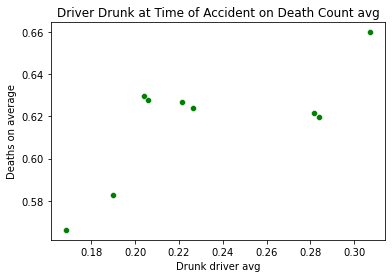

In [237]:
# Creating Scatterplots between each explanatory variable and response variable
sns.scatterplot(x="Drunk driver avg", y="Deaths on average", data=results, color='green')
plt.title("Driver Drunk at Time of Accident on Death Count avg")
plt.show()

Text(0.5, 1.0, 'Driver With Previous Accdient on Death Count avg')

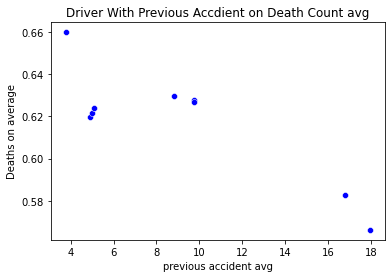

In [238]:
sns.scatterplot(x="previous accident avg", y="Deaths on average", data=results, color='blue')
plt.title("Driver With Previous Accdient on Death Count avg")


Text(0.5, 1.0, 'Driver With Previous DWI on Death Count avg')

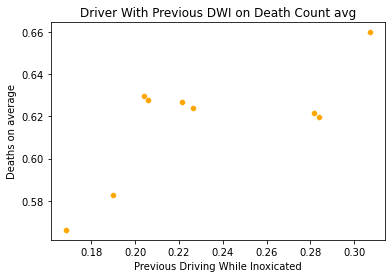

In [239]:
sns.scatterplot(x="Previous Driving While Inoxicated", y="Deaths on average", data=results, color='orange')
plt.title("Driver With Previous DWI on Death Count avg")

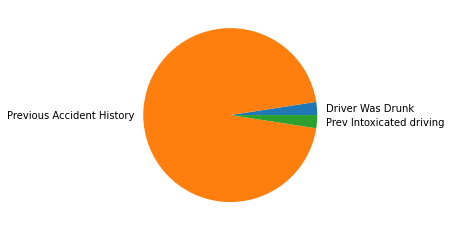

In [172]:

y = np.array([ drunk_driver_avg, previous_accident_avg, previous_driving_while_intoxicated])
mylabels = [ "Driver Was Drunk", "Previous Accident History", "Prev Intoxicated driving"]
plt.pie(y, labels = mylabels)
plt.show() 

In [226]:
#Data from 1980 was not provided so it will not be inlcuded in this part of the analysis
vehicle_2019 = vehicle_2019[vehicle_2019.TRAV_SP != 999]
vehicle_2019 = vehicle_2019[vehicle_2019.TRAV_SP != 998]
vehicle_2019 = vehicle_2019[vehicle_2019.TRAV_SP != 997]

vehicle_2015 = vehicle_2015[vehicle_2015.TRAV_SP != 999]
vehicle_2015 = vehicle_2015[vehicle_2015.TRAV_SP != 998]
vehicle_2015 = vehicle_2015[vehicle_2015.TRAV_SP != 997]

vehicle_2010 = vehicle_2010[vehicle_2010.TRAV_SP != 999]
vehicle_2010 = vehicle_2010[vehicle_2010.TRAV_SP != 998]
vehicle_2010 = vehicle_2010[vehicle_2010.TRAV_SP != 997]

vehicle_2005 = vehicle_2005[vehicle_2005.TRAV_SP != 999]
vehicle_2005 = vehicle_2005[vehicle_2005.TRAV_SP != 998]
vehicle_2005 = vehicle_2005[vehicle_2005.TRAV_SP != 997]

vehicle_2000 = vehicle_2000[vehicle_2000.TRAV_SP != 999]
vehicle_2000 = vehicle_2000[vehicle_2000.TRAV_SP != 998]
vehicle_2000 = vehicle_2000[vehicle_2000.TRAV_SP != 997]

vehicle_1995 = vehicle_1995[vehicle_1995.TRAV_SP != 999]
vehicle_1995 = vehicle_1995[vehicle_1995.TRAV_SP != 998]
vehicle_1995 = vehicle_1995[vehicle_1995.TRAV_SP != 997]

vehicle_1990 = vehicle_1990[vehicle_1990.TRAV_SP != 999]
vehicle_1990 = vehicle_1990[vehicle_1990.TRAV_SP != 998]
vehicle_1990 = vehicle_1990[vehicle_1990.TRAV_SP != 997]

vehicle_1985 = vehicle_1985[vehicle_1985.TRAV_SP != 999]
vehicle_1985 = vehicle_1985[vehicle_1985.TRAV_SP != 998]
vehicle_1985 = vehicle_1985[vehicle_1985.TRAV_SP != 997]


trav_sp_avg_1985 = np.mean(vehicle_1985['TRAV_SP'])
trav_sp_avg_1990 = np.mean(vehicle_1990['TRAV_SP'])
trav_sp_avg_1995 = np.mean(vehicle_1995['TRAV_SP'])
trav_sp_avg_2000 = np.mean(vehicle_2000['TRAV_SP'])
trav_sp_avg_2005 = np.mean(vehicle_2005['TRAV_SP'])
trav_sp_avg_2010 = np.mean(vehicle_2010['TRAV_SP'])
trav_sp_avg_2015 = np.mean(vehicle_2015['TRAV_SP'])
trav_sp_avg_2019 = np.mean(vehicle_2019['TRAV_SP'])

trav_sp_avg_ot = np.array([trav_sp_avg_1985, trav_sp_avg_1990, trav_sp_avg_1995, trav_sp_avg_2000,
                          trav_sp_avg_2005, trav_sp_avg_2010, trav_sp_avg_2015, trav_sp_avg_2019])
trav_sp_avg_ot


array([75.70095   , 74.5187    , 75.2801    , 75.327     , 76.87915   ,
       50.53951077, 43.97977988, 44.005512  ])

In [230]:
avg_deaths_ex = np.array([avg_deaths_1985, avg_deaths_1990, avg_deaths_1995, 
                           avg_deaths_2000, avg_deaths_2005, avg_deaths_2010, avg_deaths_2015, 
                           avg_deaths_2019])
avg_deaths_ex

array([0.6199 , 0.6217 , 0.62405, 0.6297 , 0.628  , 0.6267 , 0.58255,
       0.5662 ])

Text(0.5, 0, 'Travel Speed at the time of the accident (mph)')

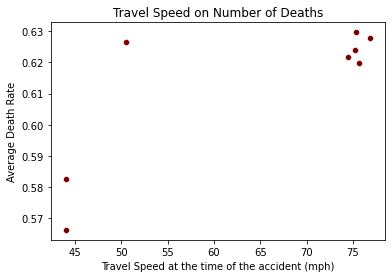

In [232]:
sns.scatterplot(x=trav_sp_avg_ot, y=avg_deaths_ex, color='maroon')
plt.title("Travel Speed on Number of Deaths")
plt.ylabel("Average Death Rate")
plt.xlabel("Travel Speed at the time of the accident (mph)")

**Travel speed on Number of Deaths Interpretation**:
This graph shows that there is a high correlation between higher driving speeds and a higher average death count per year. 

In [233]:
total_deaths_ex = np.array([ total_deaths_1985, total_deaths_1990, total_deaths_1995, 
                           total_deaths_2000, total_deaths_2005, total_deaths_2010, total_deaths_2015, 
                           total_deaths_2019])
total_deaths_ex

array([12398, 12434, 12481, 12594, 12560, 12534, 11651, 11324])

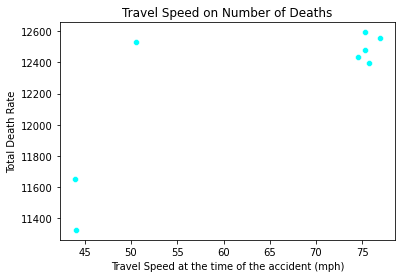

In [235]:
sns.scatterplot(x=trav_sp_avg_ot, y=total_deaths_ex, color='cyan')
plt.title("Travel Speed on Number of Deaths")
plt.ylabel("Total Death Rate")
plt.xlabel("Travel Speed at the time of the accident (mph)")
plt.show()